1. Создайте кубик
2. Измените масштаб кубика
3. Переместите кубик
4. Выполните вращение кубика
5. Выполните вращение кубика вокруг любой вершины
6. Реализация камеры
7. Реализация перспективы
8. Почти Blender

Разобратсья в матрице поворота и почистить тех

# 1

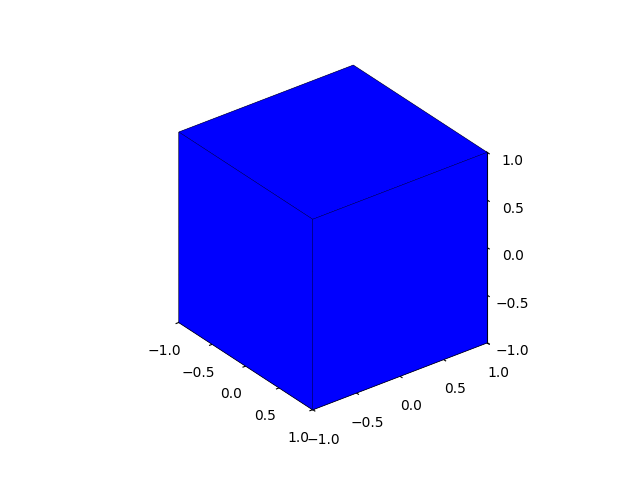

In [21]:
# Результат работы программы из приложения



import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_shape(ax, vertices, faces, color):
    # Переход от однородных координат к декартовым (деление на w)
    vertices = (vertices[:3, :] / vertices[3, :]).T
    # Добавление полигонов на график
    ax.add_collection3d(Poly3DCollection(
        vertices[faces], 
        facecolors=color, 
        edgecolors='k', 
        linewidths=0.2
    ))

# Задание вершин куба в однородных координатах (x, y, z, w)
# Последняя строка — это w-компонента (масштабный множитель)
vertices_cube = np.array([
    [-1,  1,  1, -1, -1,  1,  1, -1], # x
    [-1, -1,  1,  1, -1, -1,  1,  1], # y
    [-1, -1, -1, -1,  1,  1,  1,  1], # z
    [ 1,  1,  1,  1,  1,  1,  1,  1]  # w
])

# Индексы вершин, образующих грани куба
faces_cube = np.array([
    [0, 1, 5, 4],
    [1, 2, 6, 5],
    [2, 3, 7, 6],
    [3, 0, 4, 7],
    [0, 1, 2, 3],
    [4, 5, 6, 7]
])

# Настройка фигуры и 3D-осей
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

# Отрисовка фигуры
draw_shape(ax, vertices_cube, faces_cube, 'blue')

# Настройка отображения (границы, ракурс, метки)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)
ax.view_init(azim=-37.5, elev=30)
ax.set_xticks(np.linspace(-1, 1, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.set_zticks(np.linspace(-1, 1, 5))

plt.savefig('1_1.pdf', format='pdf')
plt.show()


C:\Users\serez\AppData\Local\Temp\ipykernel_25164\734515376.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


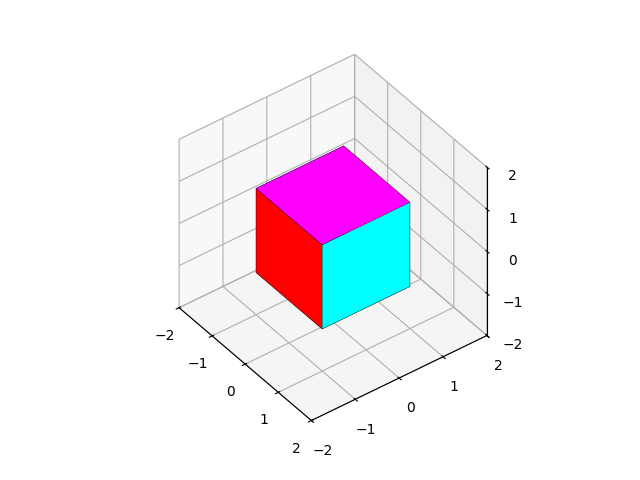

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def draw_shape(ax, vertices, faces, color):
    # Преобразование однородных координат в декартовы
    vertices = vertices[:, :3] / vertices[:, 3][:, np.newaxis]
    ax.add_collection3d(Poly3DCollection(
        vertices[faces], 
        facecolors=color, 
        edgecolors='k', 
        linewidths=0.2
    ))

# точки куба
vertices_cube = np.array([
    [-1, -1, -1, 1],
    [ 1, -1, -1, 1],
    [ 1,  1, -1, 1],
    [-1,  1, -1, 1],
    [-1, -1,  1, 1],
    [ 1, -1,  1, 1],
    [ 1,  1,  1, 1],
    [-1,  1,  1, 1]
])

# грани куба
faces_cube = np.array([
    [0, 1, 5, 4],
    [1, 2, 6, 5],
    [2, 3, 7, 6],
    [3, 0, 4, 7],
    [0, 1, 2, 3],
    [4, 5, 6, 7]
])

colors = ['red', 'cyan', 'yellow', 'blue', 'green', 'magenta']

vertices_pyramid = np.array([
    [-1, -1, 1, 1],
    [ 1, -1, 1, 1],
    [ 1,  1, 1, 1],
    [-1,  1, 1, 1],
    [ 0,  0,  3, 1]
])

faces_pyramid = np.array([
    [0, 1, 2, 3],
    [0, 1, 4, 4],
    [1, 2, 4, 4],
    [2, 3, 4, 4],
    [3, 0, 4, 4]
])

# сфера
def create_sphere(radius=1, u_segments=20, v_segments=20):
    u = np.linspace(0, 2 * np.pi, u_segments)
    v = np.linspace(0, np.pi, v_segments)
    
    vertices = []
    for vi in v:
        for ui in u:
            x = radius * np.sin(vi) * np.cos(ui)
            y = radius * np.sin(vi) * np.sin(ui)
            z = radius * np.cos(vi)
            vertices.append([x, y, z, 1])
    
    vertices = np.array(vertices)
    
    faces = []
    colors = []
    for i in range(v_segments - 1):
        for j in range(u_segments - 1):
            idx = i * u_segments + j
            faces.append([idx, idx + 1, idx + u_segments + 1, idx + u_segments])
            colors.append(mcolors.hsv_to_rgb([j / u_segments, 1, 1]))
    
    return vertices, np.array(faces), colors 
# 
vertices_sphere, faces_sphere, colors_sphere = create_sphere(radius=1.5, u_segments=30, v_segments=30)

fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube, faces_cube, colors)
# draw_shape(ax, vertices_pyramid, faces_pyramid, colors[:5])
# draw_shape(ax, vertices_sphere, faces_sphere, colors_sphere)

ax.set_box_aspect([1, 1, 1])
# ax.set_xlim(-2, 2)
# ax.set_ylim(-2, 2)
# ax.set_zlim(-2, 2)
ax.view_init(azim=-37, elev=40)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig("1_5.pdf", format="pdf")
plt.show()

# 2

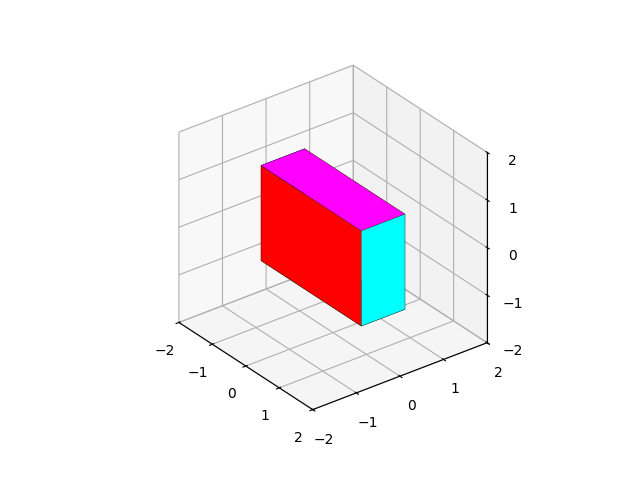

In [23]:
# Задание вершин куба в однородных координатах (x, y, z, w)
# Последняя строка — это w-компонента (масштабный множитель)
vertices_cube = np.array([
    [-1,  1,  1, -1, -1,  1,  1, -1], # x
    [-1, -1,  1,  1, -1, -1,  1,  1], # y
    [-1, -1, -1, -1,  1,  1,  1,  1], # z
    [ 1,  1,  1,  1,  1,  1,  1,  1]  # w
])

# Индексы вершин, образующих грани куба
faces_cube = np.array([
    [0, 1, 5, 4],
    [1, 2, 6, 5],
    [2, 3, 7, 6],
    [3, 0, 4, 7],
    [0, 1, 2, 3],
    [4, 5, 6, 7]
])

# Настройка фигуры и 3D-осей
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

Sx, Sy, Sz = 1.5, 1, 1
S_1 = np.array([[Sx, 0, 0, 0],
                    [0, Sy, 0, 0],
                    [0, 0, Sz, 0],
                    [0, 0, 0, 1]])

vertices_cube_1 = S_1 @ vertices_cube

Sx, Sy, Sz = 1, 0.5, 1
S_2 = np.array([[Sx, 0, 0, 0],
                    [0, Sy, 0, 0],
                    [0, 0, Sz, 0],
                    [0, 0, 0, 1]])

vertices_cube_2 = S_2 @ vertices_cube

vertices_cube_12 = S_1 @ S_2 @ vertices_cube

# Отрисовка фигуры
# draw_shape(ax, vertices_cube_1.T, faces_cube, colors)
# draw_shape(ax, vertices_cube_2.T, faces_cube, colors)
draw_shape(ax, vertices_cube_12.T, faces_cube, colors)

# Настройка отображения (границы, ракурс, метки)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=30)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('2.pdf', format='pdf')
plt.show()

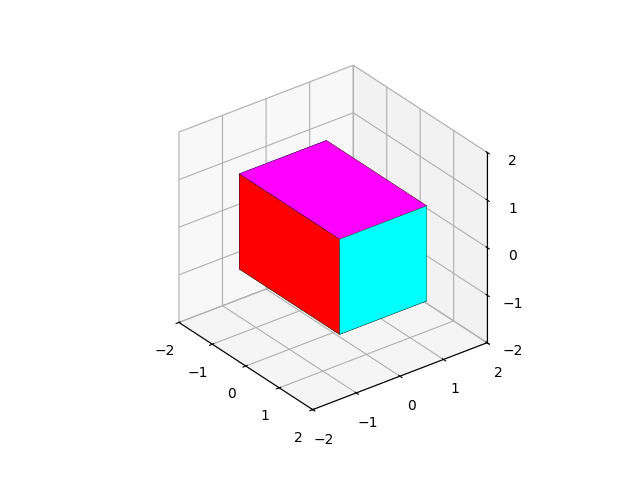

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube_1.T, faces_cube, colors)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=30)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('2_A.pdf', format='pdf')
plt.show()

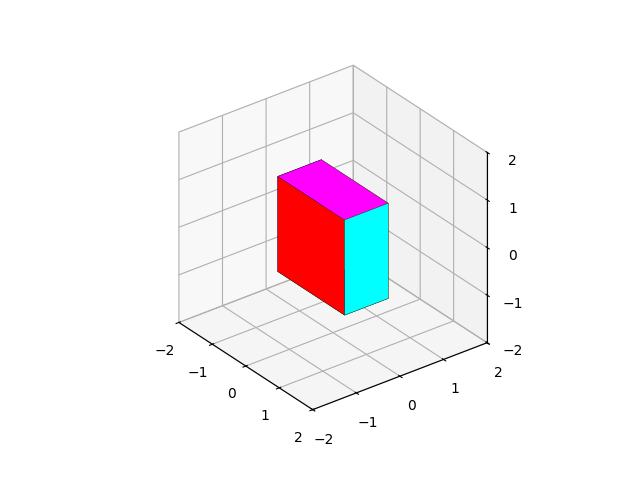

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube_2.T, faces_cube, colors)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=30)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('2_B.pdf', format='pdf')
plt.show()

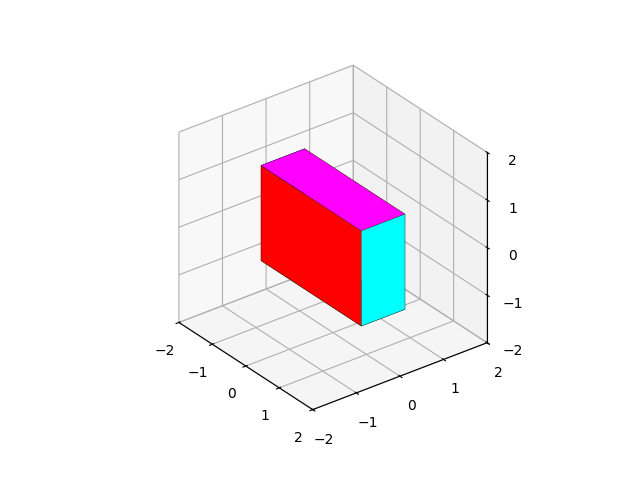

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube_12.T, faces_cube, colors)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=30)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('2_AB.pdf', format='pdf')
plt.show()

## Задание 3. Переместите кубик
- Придумайте матрицу перемещения T. 
- Разберитесь, как она работает. 
- Исследуйте, как меняется кубик в зависимости от выбранной комбинации матриц перемещения и масштабирования T S и ST. 
- Эквивалентны ли такие преобразования?


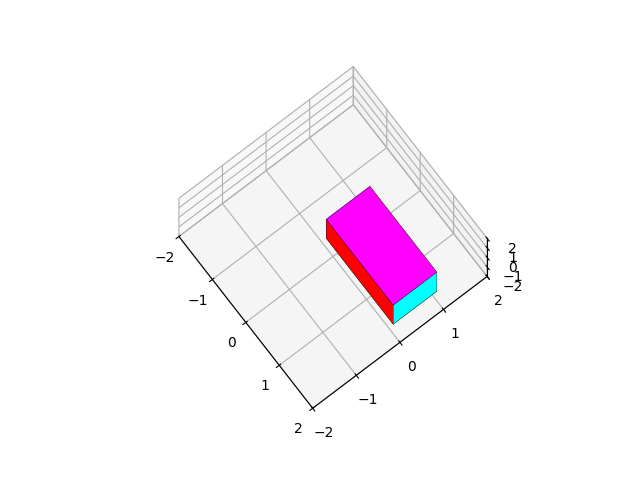

In [27]:
# Настройка фигуры и 3D-осей
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

Tx, Ty, Tz = 0.8, 0, 0
T_A = np.array([[1, 0, 0, Tx],
              [0, 1, 0, Ty],
              [0, 0, 1, Tz],
              [0, 0, 0, 1]])

Tx, Ty, Tz = 0, 0.5, 0
T_B = np.array([[1, 0, 0, Tx],
              [0, 1, 0, Ty],
              [0, 0, 1, Tz],
              [0, 0, 0, 1]])

Sx, Sy, Sz = 1, 0.5, 1
S_2 = np.array([[Sx, 0, 0, 0],
                    [0, Sy, 0, 0],
                    [0, 0, Sz, 0],
                    [0, 0, 0, 1]])

vertices_cube_TA = T_A @ vertices_cube
vertices_cube_TB = T_B @ vertices_cube
vertices_cube_TAB =  T_A @ T_B @ vertices_cube
vertices_cube_ST = S_2 @ T_A @ T_B @ vertices_cube
vertices_cube_TS = T_A @ T_B @ S_2 @ vertices_cube

# Отрисовка фигуры
# draw_shape(ax, vertices_cube_TA.T, faces_cube, colors)
draw_shape(ax, vertices_cube_TS.T, faces_cube, colors)
# draw_shape(ax, vertices_cube_2.T, faces_cube, colors)
# draw_shape(ax, vertices_cube_12.T, faces_cube, colors)

# Настройка отображения (границы, ракурс, метки)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=80)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('3_TS.pdf', format='pdf')
plt.show()

In [28]:
print(T_A @ T_B @ S_2)
print(S_2 @ T_A @ T_B)

[[1.  0.  0.  0.8]
 [0.  0.5 0.  0.5]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]
[[1.   0.   0.   0.8 ]
 [0.   0.5  0.   0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]


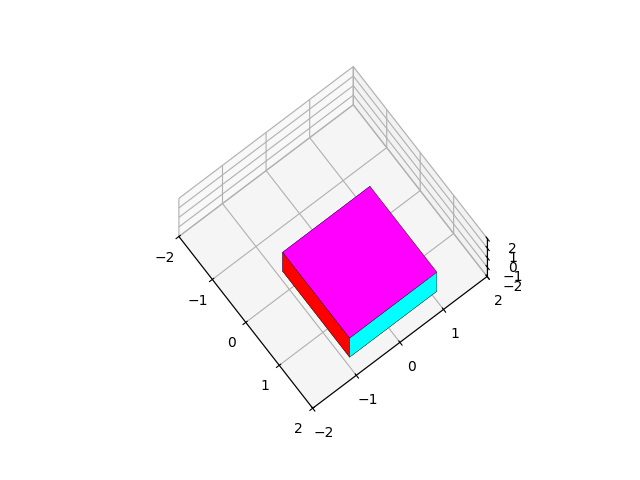

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube_TA.T, faces_cube, colors)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=80)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('3_TA.pdf', format='pdf')
plt.show()

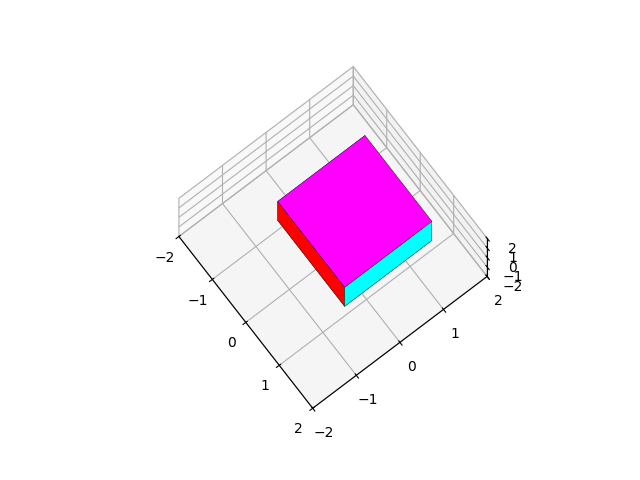

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube_TB.T, faces_cube, colors)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=80)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('3_TB.pdf', format='pdf')
plt.show()

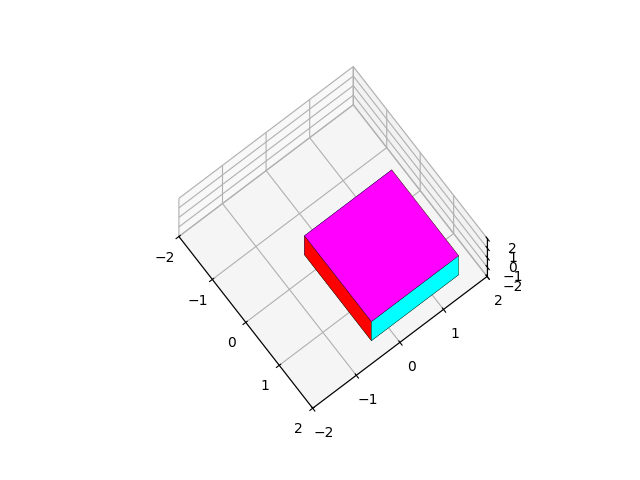

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube_TAB.T, faces_cube, colors)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=80)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('3_TAB.pdf', format='pdf')
plt.show()

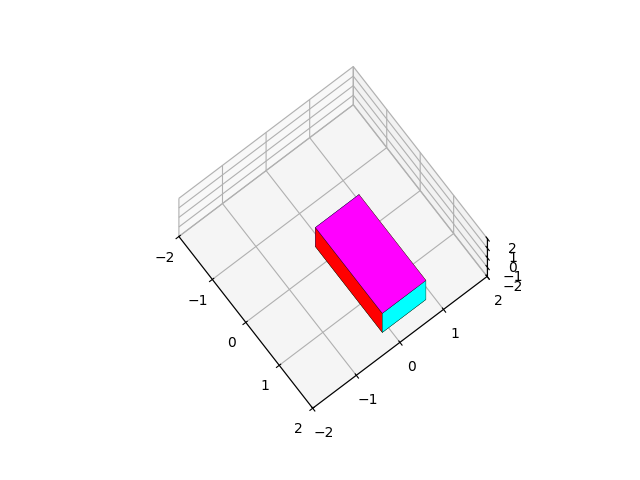

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

draw_shape(ax, vertices_cube_ST.T, faces_cube, colors)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37.5, elev=80)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('3_ST.pdf', format='pdf')
plt.show()

## Задание 4. Я его на хую вертел
- Выполните вращение кубика. 
- Придумайте вектор $v$, вокруг которого вы хотите вращать кубик на угол $\theta$. 
- Используйте формулу
- Исследуйте, как меняется кубик в зависимости от выбранных оси и угла. 
- Разберитесь, как представленная формула работает. На все графики добавьте вектор, коллинеарный оси вращения.

```
3 0 0 0.7853981633974483 
[[ 1.          0.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]]
```

```
2 2 2 0.7853981633974483 
[[ 0.80473785 -0.31061722  0.50587936  0.        ]
 [ 0.50587936  0.80473785 -0.31061722  0.        ]
 [-0.31061722  0.50587936  0.80473785  0.        ]
 [ 0.          0.          0.          1.        ]]
```

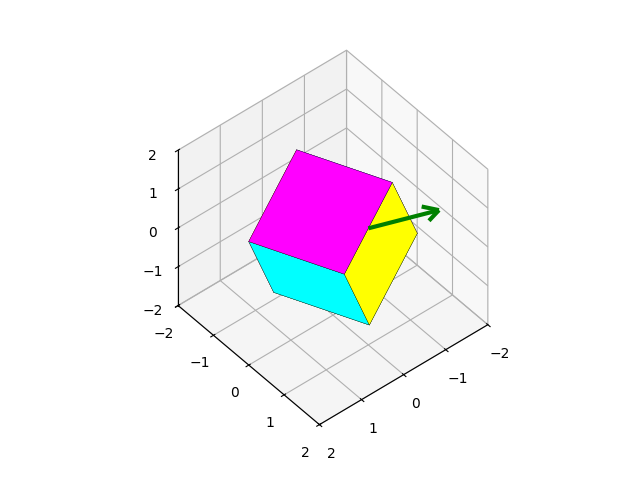

In [33]:
import scipy as sp

# Настройка фигуры и 3D-осей
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

Vx, Vy, Vz = 0, 2, 2
theta = np.pi / 6
# print(np.linalg.norm([Vx, Vy, Vz]))

J = np.array([[0, -Vz, Vy, 0],
              [Vz, 0, -Vx, 0],
              [-Vy, Vx, 0, 0],
              [0, 0, 0, 0]]) / np.linalg.norm([Vx, Vy, Vz])
R = sp.linalg.expm(J * theta)

vertices_cube_R = R @ vertices_cube

# print(Vx, Vy, Vz, theta, R)

# print(vertices_cube_R)
# Отрисовка фигуры
draw_shape(ax, vertices_cube_R.T, faces_cube, colors)

ax.quiver(0, 1, 1, Vx, Vy, Vz, color='green', arrow_length_ratio=0.2, linewidth=3)

# Настройка отображения (границы, ракурс, метки)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=50, elev=45)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('4_RB.pdf', format='pdf')
plt.show()

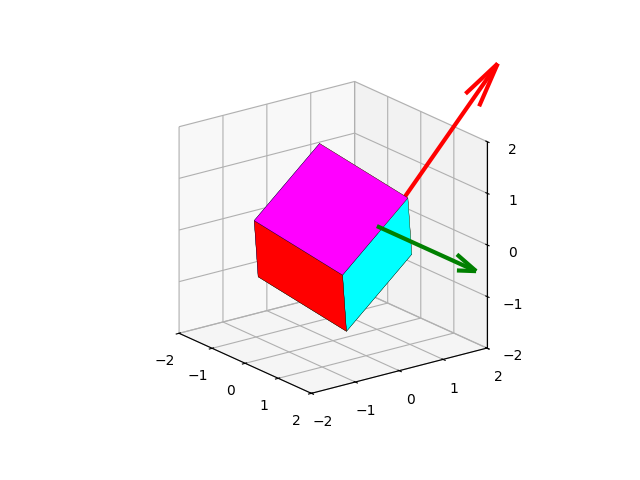

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

Vx, Vy, Vz = 3, 0, 0
A = [Vx, Vy, Vz]
theta = np.pi / 6
J = np.array([[0, -Vz, Vy, 0],
              [Vz, 0, -Vx, 0],
              [-Vy, Vx, 0, 0],
              [0, 0, 0, 0]]) / np.linalg.norm([Vx, Vy, Vz])
RA = sp.linalg.expm(J * theta)

Vx, Vy, Vz = 0, 3, 3
theta = np.pi / 6
B = [Vx, Vy, Vz]
J = np.array([[0, -Vz, Vy, 0],
              [Vz, 0, -Vx, 0],
              [-Vy, Vx, 0, 0],
              [0, 0, 0, 0]]) / np.linalg.norm([Vx, Vy, Vz])
RB = sp.linalg.expm(J * theta)

vertices_cube_R = RB @ RA @ vertices_cube

# print(Vx, Vy, Vz, theta, R)

# print(vertices_cube_R)
# Отрисовка фигуры
draw_shape(ax, vertices_cube_R.T, faces_cube, colors)

ax.quiver(0, 1, 0, *A, color='green', arrow_length_ratio=0.2, linewidth=3)
ax.quiver(1, 0, 0, *B, color='red', arrow_length_ratio=0.2, linewidth=3)

# Настройка отображения (границы, ракурс, метки)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.view_init(azim=-37, elev=20)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('4_RBA.pdf', format='pdf')
plt.show()

## 5

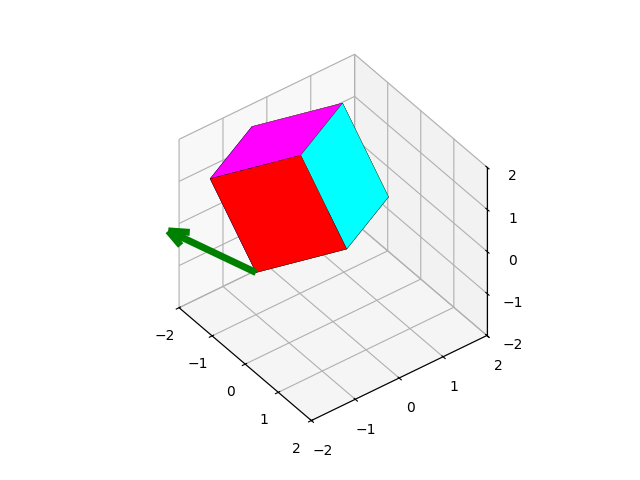

In [35]:
import scipy as sp

# Настройка фигуры и 3D-осей
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

Vx, Vy, Vz = 0, -2, 2
theta = np.pi / 4
# print(np.linalg.norm([Vx, Vy, Vz]))

Tx, Ty, Tz = -1, -1, -1
T_A = np.array([[1, 0, 0, -Tx],
              [0, 1, 0, -Ty],
              [0, 0, 1, -Tz],
              [0, 0, 0, 1]])

J = np.array([[0, -Vz, Vy, 0],
              [Vz, 0, -Vx, 0],
              [-Vy, Vx, 0, 0],
              [0, 0, 0, 0]]) / np.linalg.norm([Vx, Vy, Vz])
R = sp.linalg.expm(J * theta)

T_B = np.array([[1, 0, 0, Tx],
              [0, 1, 0, Ty],
              [0, 0, 1, Tz],
              [0, 0, 0, 1]])


vertices_cube_R = T_B @ R @T_A @ vertices_cube

# print(Vx, Vy, Vz, theta, R)

# print(vertices_cube_R)
# Отрисовка фигуры
draw_shape(ax, vertices_cube_R.T, faces_cube, colors)

ax.quiver(Tx, Ty, Tz, Vx, Vy, Vz, color='green', arrow_length_ratio=0.2, linewidth=5)

# Настройка отображения (границы, ракурс, метки)
ax.set_box_aspect([1,1,1])
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)



ax.view_init(azim=-37, elev=40)
ax.set_xticks(np.linspace(-2, 2, 5))
ax.set_yticks(np.linspace(-2, 2, 5))
ax.set_zticks(np.linspace(-2, 2, 5))

plt.savefig('5_002.pdf', format='pdf')
plt.show()

# 6

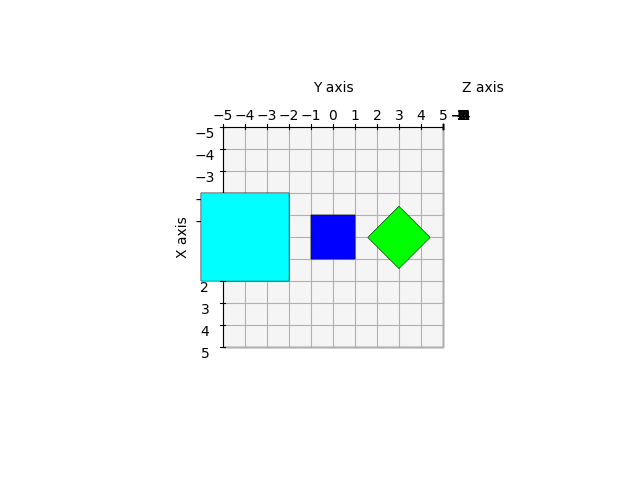

In [41]:
import scipy.linalg as sp_linalg

def get_rotation_matrix(axis, theta):
    """Возвращает матрицу поворота 4x4 через экспоненту"""
    axis = axis / np.linalg.norm(axis)
    vx, vy, vz = axis
    J = np.array([
        [0, -vz, vy, 0],
        [vz, 0, -vx, 0],
        [-vy, vx, 0, 0],
        [0, 0, 0, 0]
    ])
    return sp_linalg.expm(J * theta)

def get_translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

def get_scale_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])


fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

# 1. Бирюзовый куб (Слева, большой)
S1 = get_scale_matrix(2, 2, 2)  
T1 = get_translation_matrix(0, -4, 0)
M1 = T1 @ S1


R3 = get_rotation_matrix([0, 0, 1], np.pi / 4)
T3 = get_translation_matrix(0, 3, 0)
M3 = T3 @ R3 # Сначала повернули, потом сдвинули

cyan_cube = M1 @ vertices_cube
lime_cube = M3 @ vertices_cube


draw_shape(ax, lime_cube.T, faces_cube, 'lime')
draw_shape(ax, cyan_cube.T, faces_cube, 'cyan')
draw_shape(ax, vertices_cube.T, faces_cube, 'blue')


ax.set_box_aspect([1,1,1])
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(-5, 5)
ax.view_init(azim=0, elev=90)
#ax.view_init(azim=-37.5, elev=30)
ax.set_xticks(np.linspace(-5, 5, 11))
ax.set_yticks(np.linspace(-5, 5, 11))
ax.set_zticks(np.linspace(-5, 5, 11))
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.savefig("6_dwn.pdf", format="pdf")
plt.show()

Tc =
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0. -5.]
 [ 0.  0.  1. -5.]
 [ 0.  0.  0.  1.]]
Rc =
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]]
C =
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678 -5.        ]
 [ 0.          0.70710678  0.70710678 -5.        ]
 [ 0.          0.          0.          1.        ]]
C_inv =
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.07106781e-01  7.07106781e-01  7.07106781e+00]
 [ 0.00000000e+00 -7.07106781e-01  7.07106781e-01  6.28036983e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


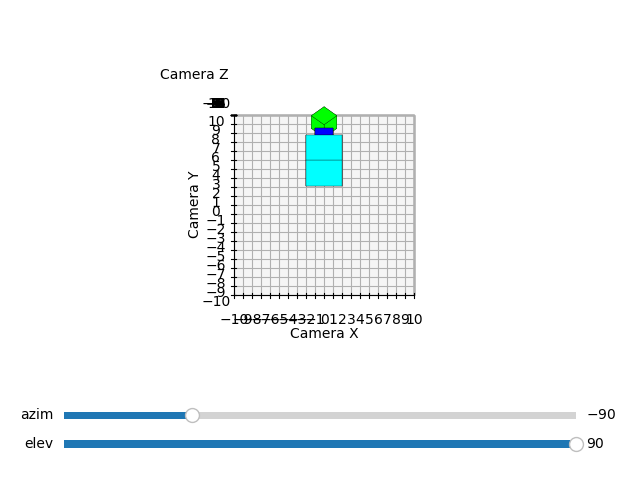

In [38]:
from matplotlib.widgets import Slider

fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

c = np.array([0.0, -5, -5])
Tc = get_translation_matrix(c[0], c[1], c[2])

axis_c = np.array([1.0, 0.0, 0.0])
theta_c = np.pi / 4
Rc = get_rotation_matrix(axis_c, theta_c)

C = Tc @ Rc

C_inv = np.linalg.inv(C) 

print("Tc =\n", Tc)
print("Rc =\n", Rc)
print("C =\n", C)
print("C_inv =\n", C_inv)

def apply_camera(C_inv, vertices):
    """
    vertices: 4xN
    возвращает 4xN после умножения C^{-1}
    """
    return C_inv @ vertices

blue_cam = apply_camera(C_inv, vertices_cube)
cyan_cam = apply_camera(C_inv, cyan_cube)
lime_cam = apply_camera(C_inv, lime_cube)


draw_shape(ax, blue_cam.T, faces_cube, 'blue')
draw_shape(ax, cyan_cam.T, faces_cube, 'cyan')
draw_shape(ax, lime_cam.T, faces_cube, 'lime')


# начальные значения углов
init_azim = -90
init_elev = 90
ax.view_init(azim=init_azim, elev=init_elev)

# --- создаём область под слайдеры ---
plt.subplots_adjust(left=0.1, bottom=0.25)  # освободить место снизу

ax_azim = plt.axes([0.1, 0.12, 0.8, 0.03])  # [left, bottom, width, height]
ax_elev = plt.axes([0.1, 0.06, 0.8, 0.03])

slider_azim = Slider(ax_azim, 'azim', -180, 180, valinit=init_azim)
slider_elev = Slider(ax_elev, 'elev', -90, 90, valinit=init_elev)

def update(val):
    az = slider_azim.val
    el = slider_elev.val
    ax.view_init(azim=az, elev=el)
    fig.canvas.draw_idle()

slider_azim.on_changed(update)
slider_elev.on_changed(update)

ax.set_box_aspect([1,1,1])
lim = 10
ax.set_xlim(-lim, lim); ax.set_ylim(-lim, lim); ax.set_zlim(-lim, lim)
ax.set_xticks(np.linspace(-lim, lim, lim*2+1))
ax.set_yticks(np.linspace(-lim, lim, lim*2+1))
ax.set_zticks(np.linspace(-lim, lim, lim*2+1))
ax.set_xlabel('Camera X')
ax.set_ylabel('Camera Y')
ax.set_zlabel('Camera Z')

plt.savefig("6_.pdf", format="pdf")
plt.show()

# 7

lime_cam z-range: 6.17157287525381 9.585786437626906


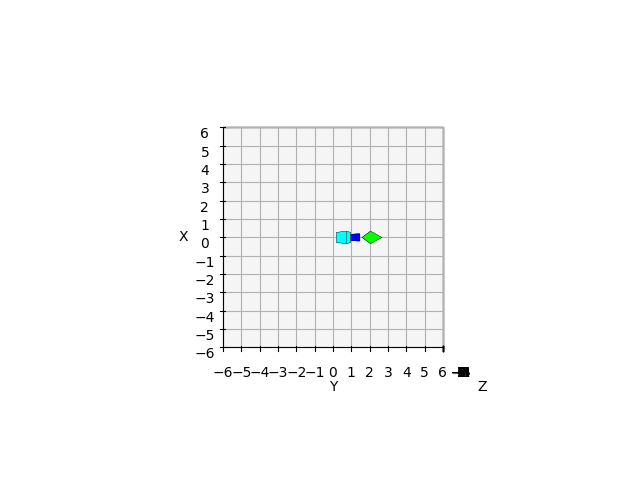

In [95]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', proj_type='ortho')

c = np.array([0, -5, -5])
Tc = get_translation_matrix(c[0], c[1], c[2])

axis_c = np.array([1.0, 0.0, 0.0])
theta_c = np.pi / 4
Rc = get_rotation_matrix(axis_c, theta_c)

C = Tc @ Rc

C_inv = np.linalg.inv(C) 

def apply_camera(C_inv, vertices):
    """
    vertices: 4xN
    возвращает 4xN после умножения C^{-1}
    """
    return C_inv @ vertices

blue_cam = apply_camera(C_inv, vertices_cube)
cyan_cam = apply_camera(C_inv, cyan_cube)
lime_cam = apply_camera(C_inv, lime_cube)

z_shift = 10.0  # подбери так, чтобы всё стало z>0 и не слишком маленьким
Tz = get_translation_matrix(0.0, 0.0, z_shift)

blue_cam = Tz @ blue_cam
cyan_cam = Tz @ cyan_cam
lime_cam = Tz @ lime_cam


print("lime_cam z-range:", lime_cam[2,:].min(), lime_cam[2,:].max())

# Параметры камеры
fov_deg = 60.0   # поле зрения (можешь поменять)
near = 1.0       # ближняя плоскость отсечения
far  = 50.0      # дальняя плоскость отсечения

# Коэффициент по FOV: S = 1 / tan(fov/2)
fov_rad = np.deg2rad(fov_deg)
S = 1.0 / np.tan(0.5 * fov_rad)

# Коэффициенты по глубине
a = far / (far - near)
b = -far * near / (far - near)

# Матрица перспективы под твою систему:
# камера в (0,0,0), смотрит вдоль +z, точки перед камерой имеют z > 0
P = np.array([
    [S,   0.0, 0.0, 0.0],
    [0.0, S,   0.0, 0.0],
    [0.0, 0.0,   a,   b],
    [0.0, 0.0, 1.0, 0.0]
], dtype=float)

# k = 0.15  # или 0.2, поиграйся, чтобы смотреться нормально

# P = np.array([
#     [1.0, 0.0, 0.0, 0.0],
#     [0.0, 1.0, 0.0, 0.0],
#     [0.0, 0.0, 1.0, 0.0],
#     [0.0, 0.0, k,   1.0]
# ], dtype=float)


def apply_perspective(P, vertices):
    # vertices: 4xN
    return P @ vertices

blue_p = apply_perspective(P, blue_cam)
cyan_p = apply_perspective(P, cyan_cam)
lime_p = apply_perspective(P, lime_cam)

draw_shape(ax, lime_p.T, faces_cube, 'lime')
draw_shape(ax, cyan_p.T, faces_cube, 'cyan')
draw_shape(ax, blue_p.T, faces_cube, 'blue')


# начальные значения углов
init_elev = -90
init_azim = 0
ax.view_init(azim=init_azim, elev=init_elev)

ax.set_box_aspect([1,1,1])
lim = 6
ax.set_xlim(-lim, lim); ax.set_ylim(-lim, lim); ax.set_zlim(-lim, lim)
ax.set_xticks(np.linspace(-lim, lim, lim*2+1))
ax.set_yticks(np.linspace(-lim, lim, lim*2+1))
ax.set_zticks(np.linspace(-lim, lim, lim*2+1))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig("7_.pdf", format="pdf")
plt.show()